## II: Initial EDA

Datasets like the ones from the Austin Animal Center offer many opportunities for exploration and learning. What follow are some of the directions this endeavor was pursued prior to modeling.

Imports and read-ins:

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
outcomes = pd.read_csv('../../datasets/outcomes_initial.csv')
intakes = pd.read_csv('../../datasets/intakes_initial.csv')

In [121]:
outcomes.drop(columns='Unnamed: 0', inplace=True)
intakes.drop(columns='Unnamed: 0', inplace=True)

Checking read-ins:

In [122]:
outcomes.head()

,animal_id,name,datetime,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,is_named,year,month,day
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,Unknown,Cat,Neutered Male,2.000,Domestic Shorthair Mix,Brown Tabby/White,1,2019,5,Wednesday
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,Unknown,Dog,Neutered Male,1.000,Chihuahua Shorthair Mix,White/Brown,1,2018,7,Wednesday
2,A821648,NaN,2020-08-16 11:38:00,08/16/2019,Euthanasia,Unknown,Other,Unknown,1.000,Raccoon,Gray,0,2020,8,Sunday
3,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,Unknown,Dog,Neutered Male,0.333,Anatol Shepherd/Labrador Retriever,Buff,1,2016,2,Saturday
4,A674754,NaN,2014-03-18 11:47:00,03/12/2014,Transfer,Partner,Cat,Intact Male,0.016,Domestic Shorthair Mix,Orange Tabby,0,2014,3,Tuesday


In [123]:
intakes.head()

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,is_named,year,month,day
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.000,Beagle Mix,Tricolor,1,2019,1,Thursday
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.000,English Springer Spaniel,White/Liver,1,2015,7,Sunday
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.917,Basenji Mix,Sable/White,1,2016,4,Thursday
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,0.077,Domestic Shorthair Mix,Calico,0,2013,10,Monday
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.000,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1,2014,6,Sunday


A brief look at datatypes for each dataset. As can be seen, many columns feature categorical data in each case.

In [124]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128838 entries, 0 to 128837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   animal_id         128838 non-null  object 
 1   name              89214 non-null   object 
 2   datetime          128838 non-null  object 
 3   found_location    128838 non-null  object 
 4   intake_type       128838 non-null  object 
 5   intake_condition  128838 non-null  object 
 6   animal_type       128838 non-null  object 
 7   sex_upon_intake   128838 non-null  object 
 8   age_upon_intake   128838 non-null  float64
 9   breed             128838 non-null  object 
 10  color             128838 non-null  object 
 11  is_named          128838 non-null  int64  
 12  year              128838 non-null  int64  
 13  month             128838 non-null  int64  
 14  day               128838 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 14.7+ MB


In [125]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129432 entries, 0 to 129431
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   animal_id         129432 non-null  object 
 1   name              89489 non-null   object 
 2   datetime          129432 non-null  object 
 3   date_of_birth     129432 non-null  object 
 4   outcome_type      129432 non-null  object 
 5   outcome_subtype   129432 non-null  object 
 6   animal_type       129432 non-null  object 
 7   sex_upon_outcome  129432 non-null  object 
 8   age_upon_outcome  129432 non-null  float64
 9   breed             129432 non-null  object 
 10  color             129432 non-null  object 
 11  is_named          129432 non-null  int64  
 12  year              129432 non-null  int64  
 13  month             129432 non-null  int64  
 14  day               129432 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 14.8+ MB


Additional information for both Intakes and Outcomes:

In [126]:
intakes.describe()

,age_upon_intake,is_named,year,month
count,128838.000000,128838.000000,128838.000000,128838.000000
mean,1.613594,0.692451,2016.872809,6.585231
std,1.984060,0.461481,2.173692,3.267842
min,0.003000,0.000000,2013.000000,1.000000
25%,0.167000,0.000000,2015.000000,4.000000
50%,1.000000,1.000000,2017.000000,7.000000
75%,2.000000,1.000000,2019.000000,9.000000
max,9.000000,1.000000,2021.000000,12.000000


In [127]:
outcomes.describe()

,age_upon_outcome,is_named,year,month
count,129432.000000,129432.000000,129432.000000,129432.000000
mean,1.634999,0.691398,2016.860730,6.690679
std,1.972881,0.461918,2.176509,3.333041
min,0.003000,0.000000,2013.000000,1.000000
25%,0.250000,0.000000,2015.000000,4.000000
50%,1.000000,1.000000,2017.000000,7.000000
75%,2.000000,1.000000,2019.000000,10.000000
max,9.000000,1.000000,2021.000000,12.000000


Histograms breaking down the age frequencies for animals taken in and animals recorded in the Outcomes dataset are shown below:

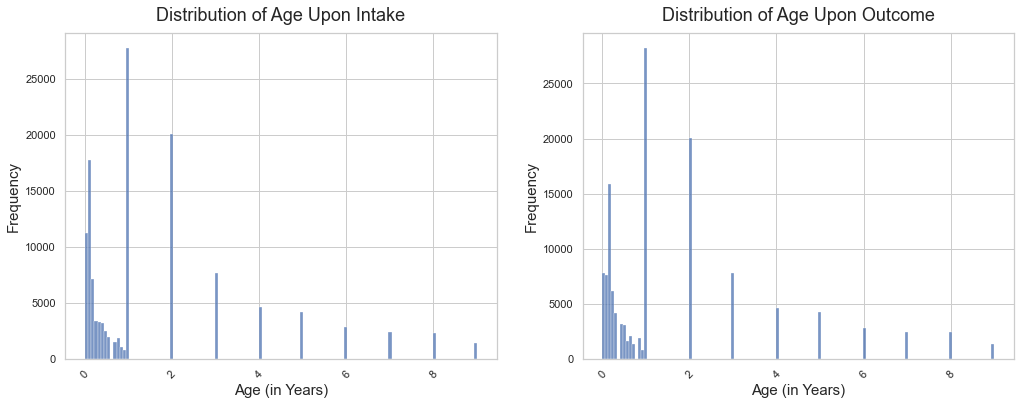

In [128]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (17, 6))
plt.subplot(1, 2, 1)

sns.histplot(x=intakes['age_upon_intake'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Age Upon Intake', fontsize = 18, pad = 12)
plt.xlabel("Age (in Years)", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15)

plt.subplot(1, 2, 2)
sns.histplot(x=outcomes['age_upon_outcome'], 
              data=outcomes, 
              palette="Paired")
plt.title('Distribution of Age Upon Outcome', fontsize = 18, pad = 12)
plt.xlabel("Age (in Years)", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

Another column is created in each DataFrame to better understand the distribution of age.

In [129]:
bins = [0, 0.5, 2, 6, 8, np.inf]
names = ['< 6 Months', '6 Months-2 Years', '2 Years-6 Years', 
         '6 Years-8 Years', '8 Years+']

intakes['age_type'] = pd.cut(intakes['age_upon_intake'], bins, labels=names)
outcomes['age_type'] = pd.cut(outcomes['age_upon_outcome'], bins, labels=names)

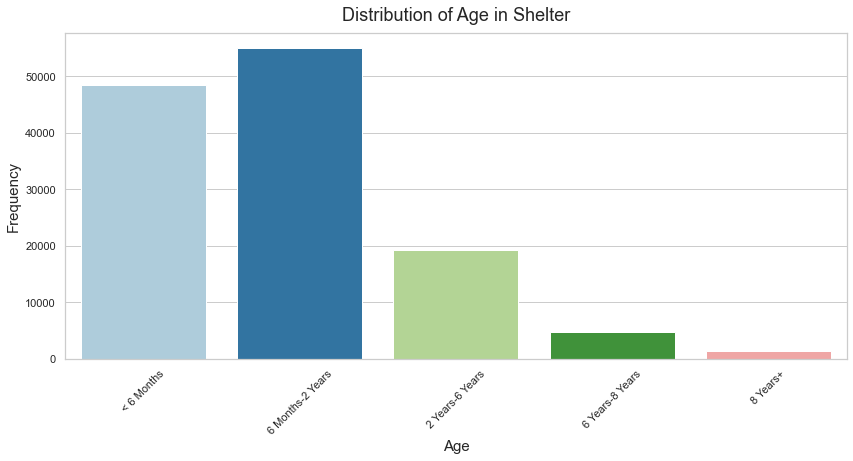

In [135]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (14, 6))

sns.countplot(x=intakes['age_type'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Age in Shelter', fontsize = 18, pad = 12)
plt.xlabel("Age", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

Similarly, the distribution of animals on grounds of whether they are male or female and whether or not they've been spayed/neutered:

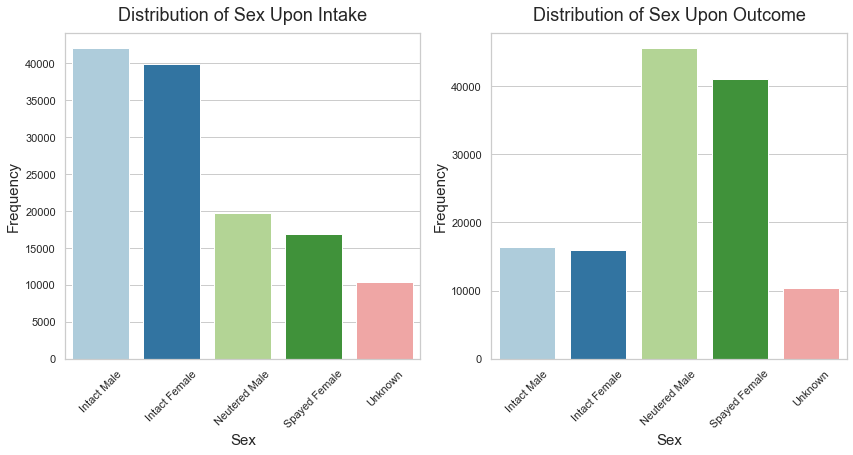

In [136]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x=intakes['sex_upon_intake'], 
              data=intakes, 
              palette="Paired",
             order = ['Intact Male', 'Intact Female', 'Neutered Male', 'Spayed Female', 'Unknown'])
plt.title('Distribution of Sex Upon Intake', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(x=outcomes['sex_upon_outcome'], 
              data=outcomes, 
              palette="Paired",
             order = ['Intact Male', 'Intact Female', 'Neutered Male', 'Spayed Female', 'Unknown'])
plt.title('Distribution of Sex Upon Outcome', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

To understand this distribution further, additional columns are created.

In [137]:
intakes['sex'] = intakes['sex_upon_intake'].str.contains("Male").map({True: 'Male', False:'Female'})
intakes['is_neutered'] = intakes['sex_upon_intake'].str.split(' ').str[0]
intakes['is_neutered'] = (intakes['is_neutered'] != 'Intact').map({True: 'Neutered/Spayed', False:'Intact'})

outcomes['sex'] = outcomes['sex_upon_outcome'].str.contains("Male").map({True: 'Male', False:'Female'})
outcomes['is_neutered'] = outcomes['sex_upon_outcome'].str.split(' ').str[0]
outcomes['is_neutered'] = (outcomes['is_neutered'] != 'Intact').map({True: 'Neutered/Spayed', False:'Intact'})

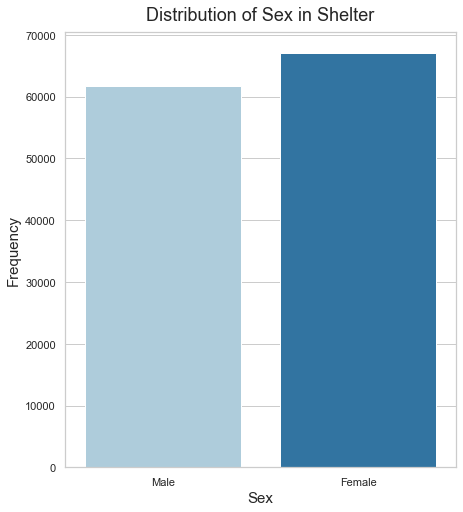

In [138]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (7, 8))
sns.countplot(x=intakes['sex'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Sex in Shelter', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel("Frequency",fontsize = 15);

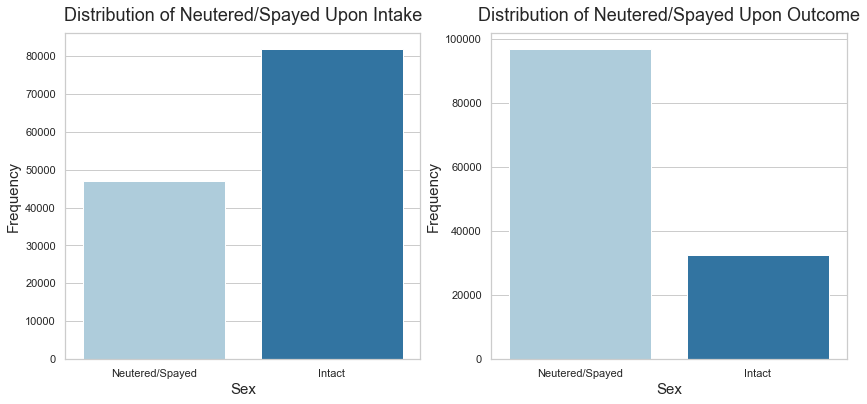

In [139]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x=intakes['is_neutered'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Neutered/Spayed Upon Intake', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel("Frequency",fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(x=outcomes['is_neutered'], 
              data=outcomes, 
              palette="Paired")
plt.title('Distribution of Neutered/Spayed Upon Outcome', fontsize = 18, pad = 12)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel("Frequency",fontsize = 15);

A few cells reflecting the color frequency and the tally of each animal type:

In [140]:
intakes.groupby(['color']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:3]

color
Black/White    13470
Black          10779
Brown Tabby     7358
Name: animal_id, dtype: int64

In [141]:
outcomes.groupby(['color']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:3]

color
Black/White    13557
Black          10848
Brown Tabby     7376
Name: animal_id, dtype: int64

In [142]:
intakes.groupby(['animal_type']).count().sort_values(by = 'animal_id', ascending= False)['animal_id']

animal_type
Dog          72763
Cat          48578
Other         6866
Bird           608
Livestock       23
Name: animal_id, dtype: int64

In [143]:
outcomes.groupby(['animal_type']).count().sort_values(by = 'animal_id', ascending= False)['animal_id']

animal_type
Dog          73068
Cat          48844
Other         6889
Bird           610
Livestock       21
Name: animal_id, dtype: int64

One question that arose early on was how to organize all the different breeds of animals in such a way that is most meaningful for the modeling phase. Below are some of the most common values in the `breed` column:

In [144]:
intakes.groupby(['breed']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:10]

breed
Domestic Shorthair Mix      31113
Domestic Shorthair           8678
Pit Bull Mix                 8559
Labrador Retriever Mix       7001
Chihuahua Shorthair Mix      6252
Domestic Medium Hair Mix     3145
German Shepherd Mix          3091
Bat Mix                      1749
Bat                          1618
Pit Bull                     1563
Name: animal_id, dtype: int64

In [145]:
outcomes.groupby(['breed']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:10]

breed
Domestic Shorthair Mix      31588
Pit Bull Mix                 8646
Domestic Shorthair           8422
Labrador Retriever Mix       7071
Chihuahua Shorthair Mix      6325
Domestic Medium Hair Mix     3183
German Shepherd Mix          3110
Bat Mix                      1753
Bat                          1617
Domestic Longhair Mix        1561
Name: animal_id, dtype: int64

Below, some of the rarer dog breeds:

In [146]:
intakes[intakes['animal_type']=='Dog'].groupby(['breed']).count().sort_values(by = 'animal_id', ascending= True)['animal_id'][:5]

breed
Affenpinscher                      1
Golden Retriever/Cocker Spaniel    1
Golden Retriever/Catahoula         1
Golden Retriever/Brittany          1
Golden Retriever/Border Terrier    1
Name: animal_id, dtype: int64

In [147]:
outcomes[outcomes['animal_type']=='Dog'].groupby(['breed']).count().sort_values(by = 'animal_id', ascending= True)['animal_id'][:5]

breed
Affenpinscher                      1
Golden Retriever/Catahoula         1
Golden Retriever/Brittany          1
Golden Retriever/Border Terrier    1
Golden Retriever/Bearded Collie    1
Name: animal_id, dtype: int64

To what degree does the actual year influence outcomes at an animal shelter? It is important to note that the data provided starts in October 2013 which explains the low distribution in that year. Below charts the frequency of entries for both Intakes and Outcomes, by year:

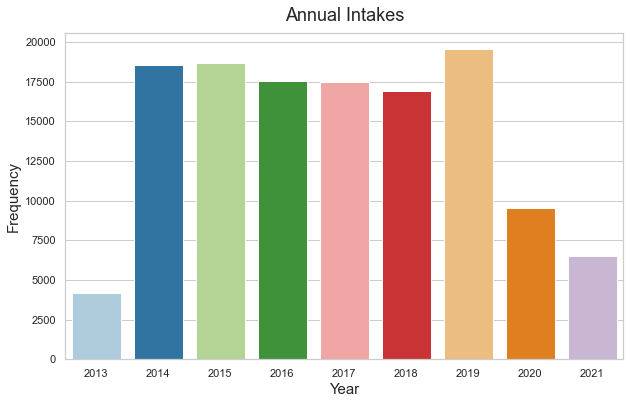

In [166]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10, 6))
sns.countplot(x=intakes['year'], 
              data=intakes, 
              palette="Paired",
             order = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title('Annual Intakes', fontsize = 18, pad = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15);

Do animal shelters see seasonal patterns? Note that incomplete or unusual years (such as 2020 due to COVID-19) were excluded from this analysis. As with yearly distribution, frequency by month can be seen in the cells below:

In [178]:
# Creating DataFrame of intakes from years 2014-2019
intakes_2014_2019 = intakes[intakes['year']!='2013']
intakes_2014_2019 = intakes_2014_2019[intakes_2014_2019['year']!='2020']
intakes_2014_2019 = intakes_2014_2019[intakes_2014_2019['year']!='2021']

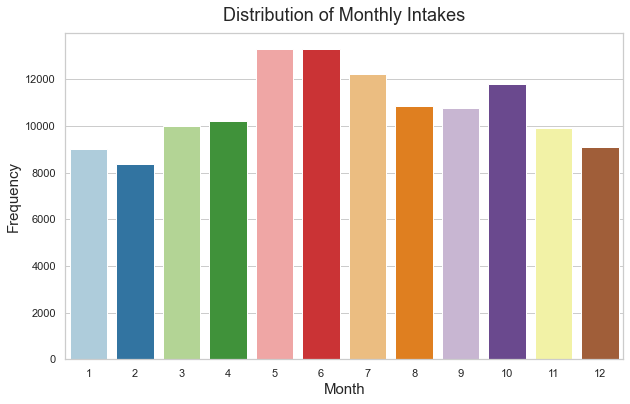

In [179]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10, 6))

sns.countplot(x=intakes_2014_2019['month'], 
              data=intakes_2014_2019, 
              palette="Paired",
             order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title('Distribution of Monthly Intakes', fontsize = 18, pad = 12)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15);

Are animal outcomes influenced by the day of the week? Visuals below:

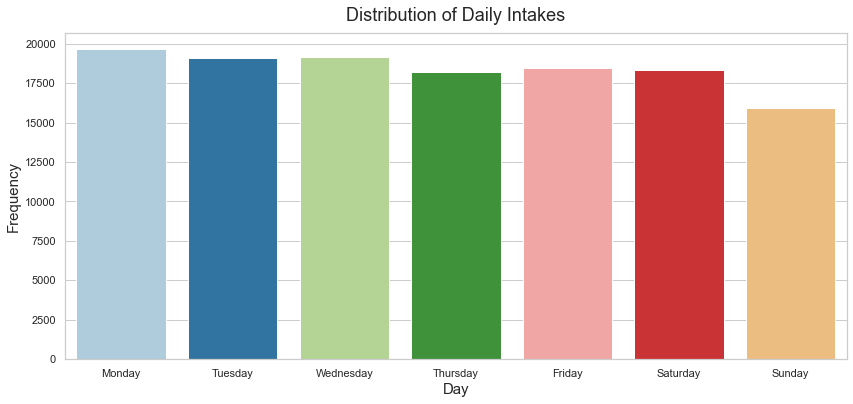

In [182]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (14, 6))

sns.countplot(x=intakes['day'], 
              data=intakes, 
              palette="Paired",
             order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Daily Intakes', fontsize = 18, pad = 12)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15);

Pets have names, and here are some of the more common ones, from both the Intakes and Outcomes datasets:

In [151]:
intakes[intakes['animal_type']=='Dog'].groupby(['name']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:5]

name
Max      528
Bella    475
Luna     407
Rocky    382
Daisy    339
Name: animal_id, dtype: int64

In [152]:
intakes[intakes['animal_type']=='Cat'].groupby(['name']).count().sort_values(by = 'animal_id', ascending= False)['animal_id'][:5]

name
Luna       106
Bella       74
Kitty       72
Charlie     69
Shadow      64
Name: animal_id, dtype: int64

Do the conditions surrounding an animal's intake influence his or her outcome? Below is a breakdown of `intake condition` frequency for entries in the Intakes dataset.

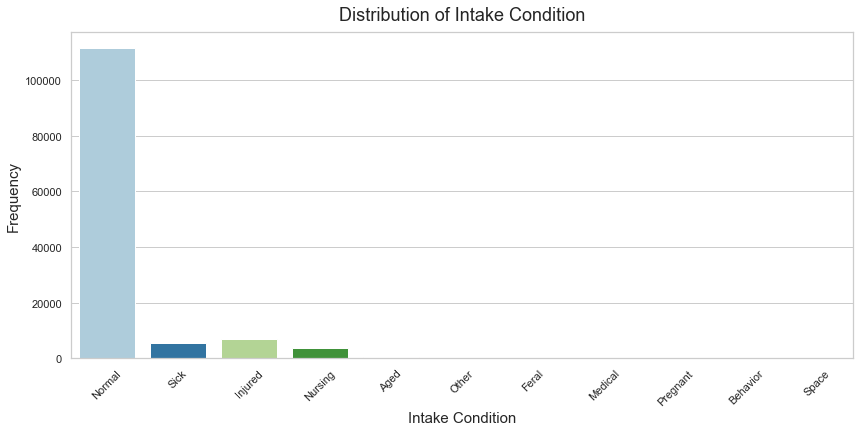

In [153]:
plt.figure(figsize = (14, 6))
sns.countplot(x=intakes['intake_condition'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Intake Condition', fontsize = 18, pad = 12)
plt.xlabel("Intake Condition", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

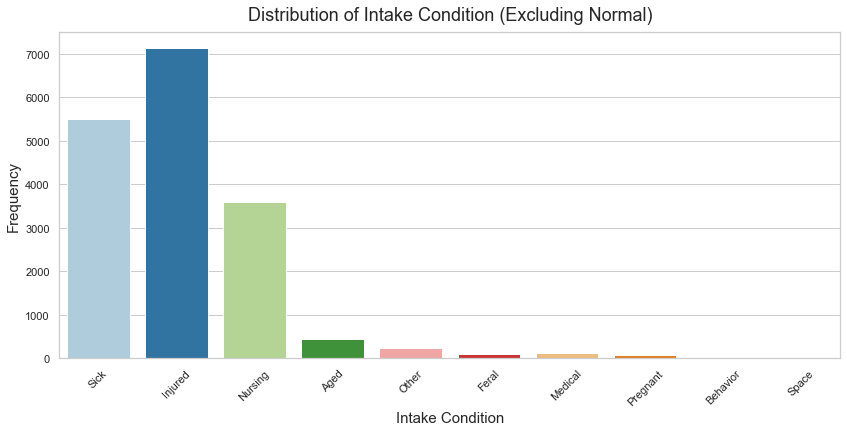

In [154]:
plt.figure(figsize = (14, 6))
sns.countplot(x=intakes[intakes['intake_condition']!='Normal']['intake_condition'], 
              data=intakes[intakes['intake_condition']!='Normal'], 
              palette="Paired")
plt.title('Distribution of Intake Condition (Excluding Normal)', fontsize = 18, pad = 12)
plt.xlabel("Intake Condition", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

Likewise, does an animal's living situation prior to being brought in have bearing on the future? The cell below charts `intake type` frequency:

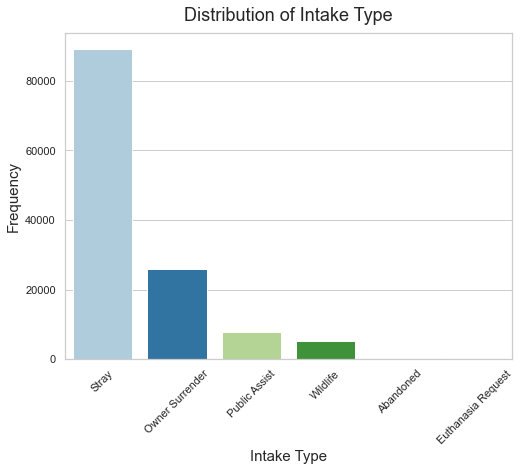

In [155]:
plt.figure(figsize = (8, 6))
sns.countplot(x=intakes['intake_type'], 
              data=intakes, 
              palette="Paired",
             order = ['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Abandoned', 'Euthanasia Request'])
plt.title('Distribution of Intake Type', fontsize = 18, pad = 12)
plt.xlabel("Intake Type", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

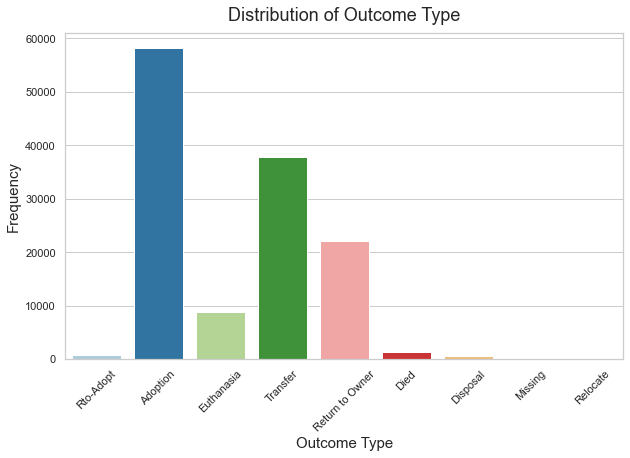

In [156]:
plt.figure(figsize = (10, 6))
sns.countplot(x=outcomes['outcome_type'], 
              data=outcomes, 
              palette="Paired")
plt.title('Distribution of Outcome Type', fontsize = 18, pad = 12)
plt.xlabel("Outcome Type", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Frequency",fontsize = 15);

Additional EDA will be completed after merging the two DataFrames on the next notebook.